# Projeto ATD
## 2ºsemestre 2020/2021
### FCTUC - DEI
### Membros:
* Joel Oliveira - 2019227468
* Tomás Mendes - 2019232272


In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import pandas as pd
import math
from scipy import signal
import scipy as sy
from numpy.fft import fft, fftshift
import seaborn as sns
import matplotlib

#Colocar a False para gráficos claros (concordância com theme branco do jupyter)
sns.set_style("whitegrid")
dark_background = False
if dark_background:
    sns.set_palette("Paired")
else:
    sns.set_palette("deep")

### Ler dados do acelerómetro para variável
##### userA_expB (Experiência B do Sujeito A)

In [2]:
user1_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp01_user01.txt"), columns = ['X','Y','Z'])
user1_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp02_user01.txt"), columns = ['X','Y','Z'])
user2_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp03_user02.txt"), columns = ['X','Y','Z'])
user2_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp04_user02.txt"), columns = ['X','Y','Z'])
user3_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp05_user03.txt"), columns = ['X','Y','Z'])
user3_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp06_user03.txt"), columns = ['X','Y','Z'])
user4_1 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp07_user04.txt"), columns = ['X','Y','Z'])
user4_2 = pd.DataFrame(data = np.loadtxt("Datasets/acc_exp08_user04.txt"), columns = ['X','Y','Z'])

#### Juntar à estrutura com os dados a informação do tempo em minutos de cada experiência

In [3]:
fs = 50 # Hz
T = 1/fs # sec

user1_1['Time (min)'] = np.arange(0, len(user1_1['X']) * T, T)/60
user1_2['Time (min)'] = np.arange(0, len(user1_2['X']) * T, T)/60 
user2_1['Time (min)'] = np.arange(0, len(user2_1['X']) * T, T)/60 
user2_2['Time (min)'] = np.arange(0, len(user2_2['X']) * T, T)/60 
user3_1['Time (min)'] = np.arange(0, len(user3_1['X']) * T, T)/60 
user3_2['Time (min)'] = np.arange(0, len(user3_2['X']) * T, T)/60 
user4_1['Time (min)'] = np.arange(0, len(user4_1['X']) * T, T)/60 
user4_2['Time (min)'] = np.arange(0, len(user4_2['X']) * T, T)/60

### Guardar os dados das experiências num ficheiro .dat, para ler mais tarde

In [4]:
users_exp = [user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2]
pd.to_pickle(users_exp, "users.dat")

### Verificação dos dados presentes no DataSet, através da função 'info()' das DataFrame da livraria Pandas.
#### Esta função devolve informações sobre a informação presente na DataFrame. É devolvida uma string com a quantidade de valores presente não nula, a quantidade de valores presente com valor nulo e ainda o tipoda informação presente em cada coluna. 
#### Assim, é possível verificar que o DataSet está bastante completo, sem falhas de informação, e o tipo de dados existente nele. No caso dados do tipo float.

In [5]:
for i in range(len(users_exp)):
    print("//" + "_"*9 + f"Sujeito {i//2+1} Experiencia {i%2+1}" + "_"*9 + "\\\\", end = '\n\n')
    users_exp[i].info()
    print("\n")
    

//_________Sujeito 1 Experiencia 1_________\\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20598 entries, 0 to 20597
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           20598 non-null  float64
 1   Y           20598 non-null  float64
 2   Z           20598 non-null  float64
 3   Time (min)  20598 non-null  float64
dtypes: float64(4)
memory usage: 643.8 KB


//_________Sujeito 1 Experiencia 2_________\\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19286 entries, 0 to 19285
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   X           19286 non-null  float64
 1   Y           19286 non-null  float64
 2   Z           19286 non-null  float64
 3   Time (min)  19286 non-null  float64
dtypes: float64(4)
memory usage: 602.8 KB


//_________Sujeito 2 Experiencia 1_________\\

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18026 entries

In [6]:
for i in range(len(users_exp)):
    print("//" + "_"*15 + f"Sujeito {i//2+1} Experiencia {i%2+1}" + "_"*15 + "\\\\", end='\n\n')
    print(users_exp[i].describe())
    print("\n")


//_______________Sujeito 1 Experiencia 1_______________\\

                  X             Y             Z    Time (min)
count  20598.000000  20598.000000  20598.000000  20598.000000
mean       0.880673     -0.101714      0.097088      3.432833
std        0.346449      0.340091      0.285555      1.982092
min       -0.647222     -1.209722     -0.676389      0.000000
25%        0.805556     -0.285764     -0.081944      1.716417
50%        0.981945     -0.202778     -0.004167      3.432833
75%        1.019445     -0.031944      0.204167      5.149250
max        1.950000      1.036111      1.269444      6.865667


//_______________Sujeito 1 Experiencia 2_______________\\

                  X             Y             Z    Time (min)
count  19286.000000  19286.000000  19286.000000  19286.000000
mean       0.886662     -0.119086     -0.014771      3.214167
std        0.305887      0.410941      0.240264      1.855844
min       -0.870833     -1.170833     -0.929167      0.000000
25%        0

#### Leitura dos dados inseridos no ficheiro 'users.dat', anteriormente.
##### Este ficheiro contém um array com as informações de cada experiência inseridas numa DataFrame

In [7]:
users_exp = pd.read_pickle("users.dat")
user1_1, user1_2, user2_1, user2_2, user3_1, user3_2, user4_1, user4_2 = users_exp

### Atividades Dinâmicas:
#### 1. WALKING
#### 2. WALKING_UPSTAIRS
#### 3. WALKING_DOWNSTAIRS

### Atividades Estáticas:
#### 1. SITTING
#### 2. STANDING
#### 3. LAYING

### Atividades de Transição:
#### 1. STAND_TO_SIT
#### 2. SIT_TO_STAND
#### 3. SIT_TO_LIE
#### 4. LIE_TO_SIT
#### 5. STAND_TO_LIE
#### 6. LIE_TO_STAND

#### Função para escrever manualmente as atividades nos plots

In [8]:
def plot_with_labels(upxvalues, downxvalues, up, down, user, index):
    '''
    Plots the X, Y, Z axis from the accelerometer
            Parameters:
                    upxvalues (list): ordenadas para impressão de up (labels a colocar em cima)
                    downxvalues (list): ordenadas para impressão de down (labels a colocar em baixo)
                    up (list): lista com as labels das atividades
                    down (list): list com as labels das atividades
                    user (pandas.dataFrame): dataFrame com os dados do user a imprimir.
                    index (int): numero da experiência, de modo a imprimir o Numero do Sujeito, bem como da sua experiência
    '''
    figure, subplots = plt.subplots(nrows=3, ncols=1, figsize=(20,8), facecolor = 'black' if dark_background else 'white')
    figure.suptitle(f"Valores Obtidos Pelo Acelerómetro na Experiência {index%2+1} do Sujeito {index//2+1}", fontsize = 'xx-large', c='white' if dark_background else 'black')
    
    if dark_background:
        subplots[0].set_facecolor('k')
        subplots[1].set_facecolor('k')
        subplots[2].set_facecolor('k')
    #X
    subplots[0].plot( user['Time (min)'], user['X'], lw = 0.3)
    subplots[0].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[0].set_ylabel("ACC_X", c = 'white' if dark_background else 'black')
    subplots[0].set_xlim(0, max(user['Time (min)']))
    
    subplots[0].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[0].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    #Y
    subplots[1].plot( user['Time (min)'], user['Y'], lw = 0.3)
    subplots[1].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[1].set_ylabel("ACC_Y", c = 'white' if dark_background else 'black')
    subplots[1].set_xlim(0, max(user['Time (min)']))
    
    subplots[1].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[1].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    #Z
    subplots[2].plot( user['Time (min)'], user['Z'], lw = 0.3)
    subplots[2].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[2].set_ylabel("ACC_Z", c = 'white' if dark_background else 'black')
    subplots[2].set_xlim(0, max(user['Time (min)']))
    
    subplots[2].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[2].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    xmin,xmax = subplots[0].get_xlim()
    
    for i in range(len(upxvalues)):
        yv = 0.95 if i % 2 == 0 else 0.90
        frase = up[i]
        xv = upxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        
    yv = 0.01 
    for i in range(len(downxvalues)):
        frase = down[i]
        xv = downxvalues[i]/xmax
        
        subplots[0].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[0].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[1].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[1].transAxes, xytext = (xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
        subplots[2].annotate(xycoords = 'axes fraction', text = frase, xy = (xv,yv), textcoords = subplots[2].transAxes, xytext =(xv,yv), fontweight='bold', c = 'white' if dark_background else 'black')
    figure.tight_layout()

## Visualização das atividades para todas as experiências do nosso dataset

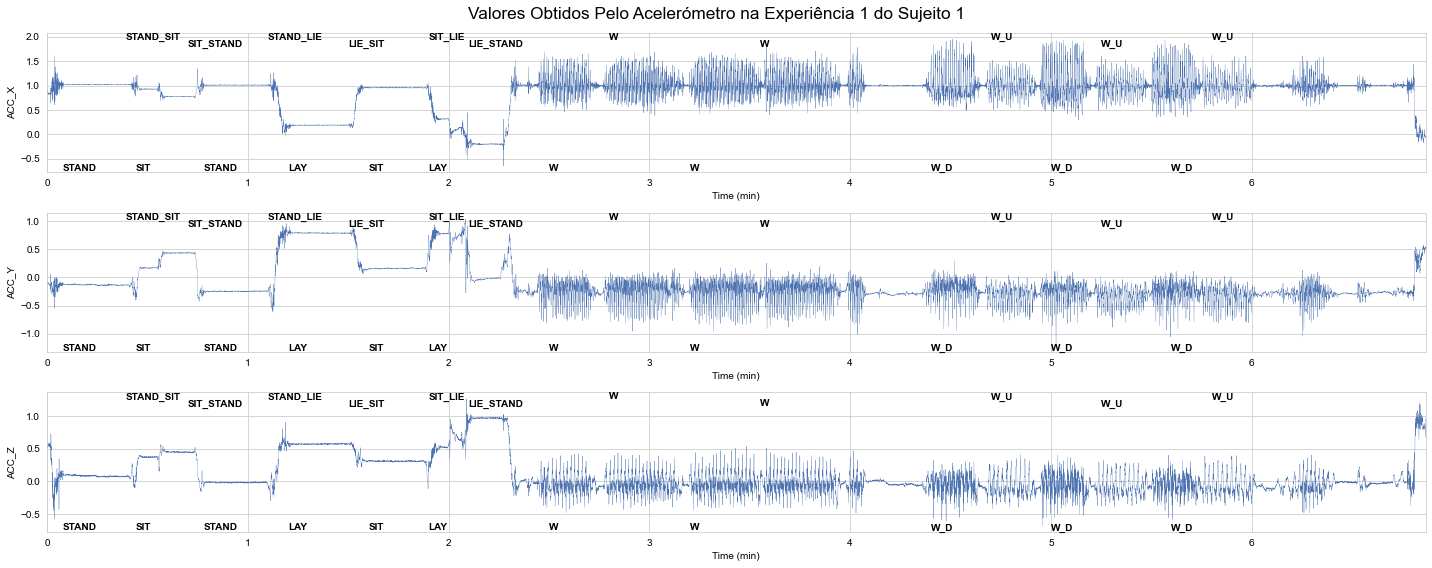

In [9]:
downintervals = [0.08, 0.44, 0.78,  1.2, 1.6, 1.9, 2.5,  3.2, 4.4, 5, 5.6]
upintervals = [0.39, 0.7, 1.1, 1.5, 1.9, 2.1, 2.8, 3.55, 4.7, 5.25, 5.8  ]

downlabels = ['STAND', 'SIT', 'STAND','LAY', 'SIT', 'LAY', 'W', 'W','W_D', 'W_D', 'W_D']
uplabels = ['STAND_SIT', 'SIT_STAND', 'STAND_LIE', 'LIE_SIT', 'SIT_LIE', 'LIE_STAND', 'W', 'W', 'W_U', 'W_U', 'W_U' ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user1_1, 0)

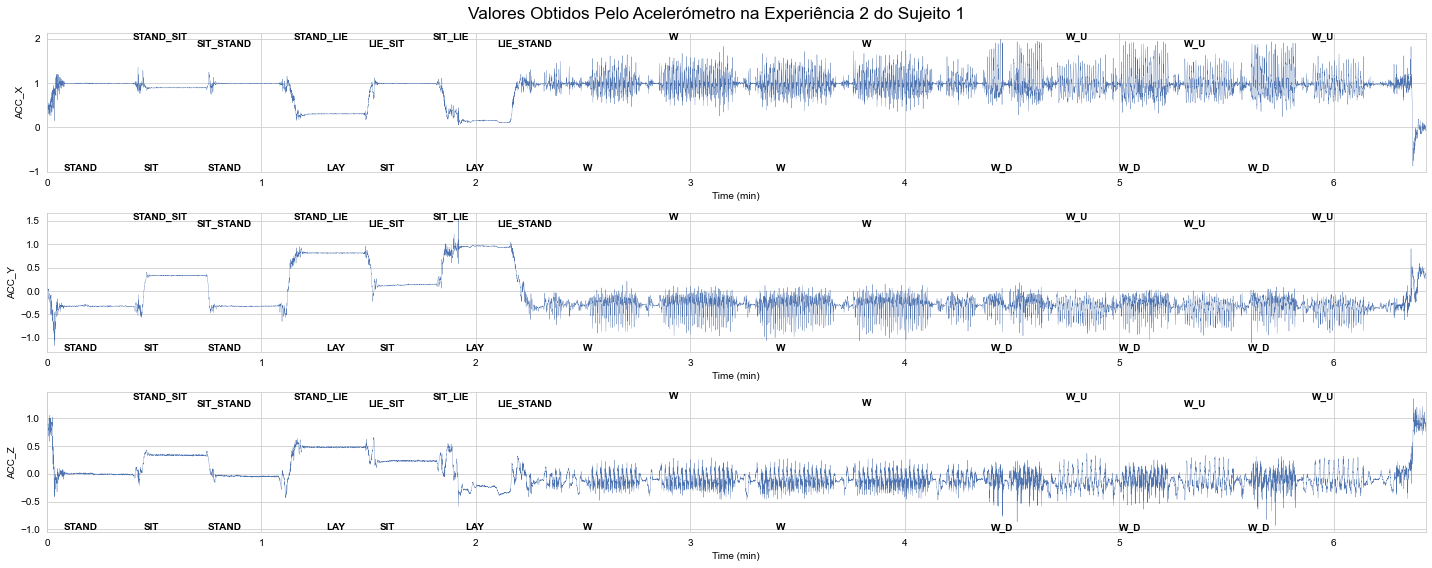

In [10]:
downintervals = [ 0.08, 0.45, 0.75, 1.3, 1.55, 1.95, 2.5, 3.4, 4.4, 5, 5.6]
upintervals = [ 0.40, 0.7, 1.15, 1.5, 1.8, 2.1, 2.9, 3.8, 4.75, 5.3, 5.9 ]

downlabels = [ 'STAND', "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_D", "W_D", "W_D" ]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W", "W_U", "W_U", "W_U" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels,user1_2, 1)

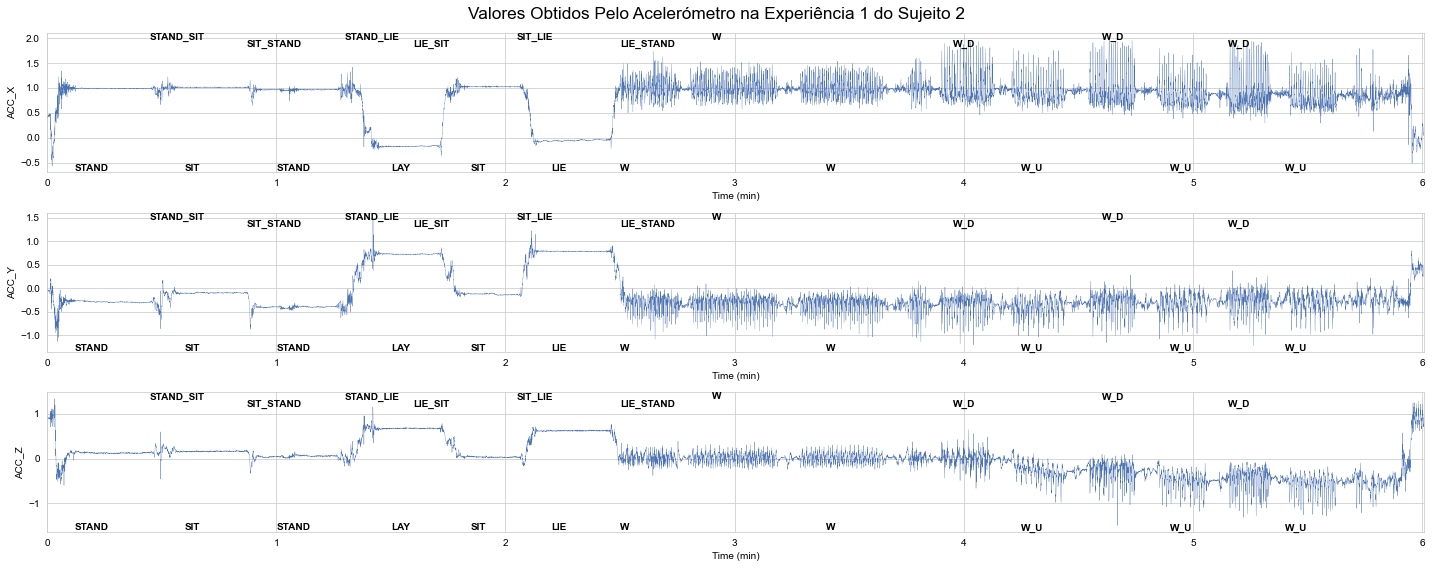

In [11]:
downintervals = [ 0.12, 0.6, 1, 1.5, 1.85, 2.2, 2.5, 3.4, 4.25, 4.9, 5.4 ]
upintervals = [ 0.45, 0.87, 1.3, 1.6, 2.05, 2.5, 2.9, 3.95, 4.6, 5.15 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D"]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_1, 2)

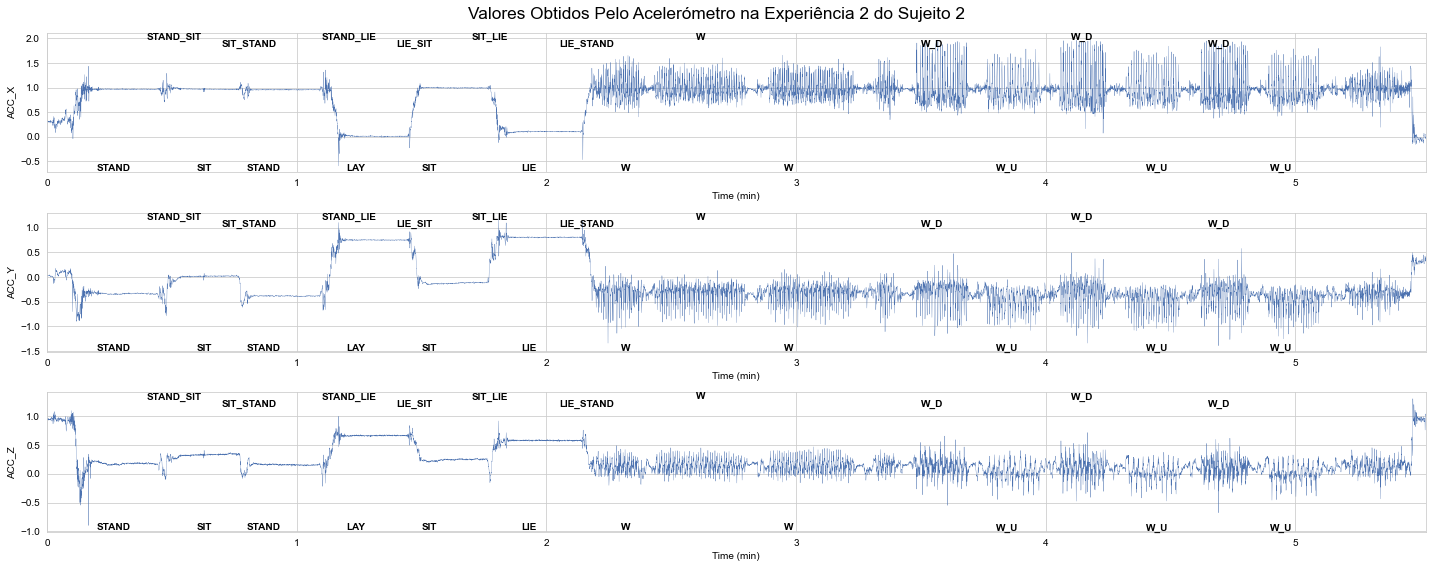

In [12]:
downintervals = [ 0.2, 0.6, 0.8, 1.2, 1.5, 1.9, 2.3, 2.95, 3.8, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.4, 1.7, 2.05, 2.6, 3.5, 4.1, 4.65 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LIE", "W", "W", "W_U", "W_U", "W_U" ]
uplabels = [ "STAND_SIT",  "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user2_2, 3)

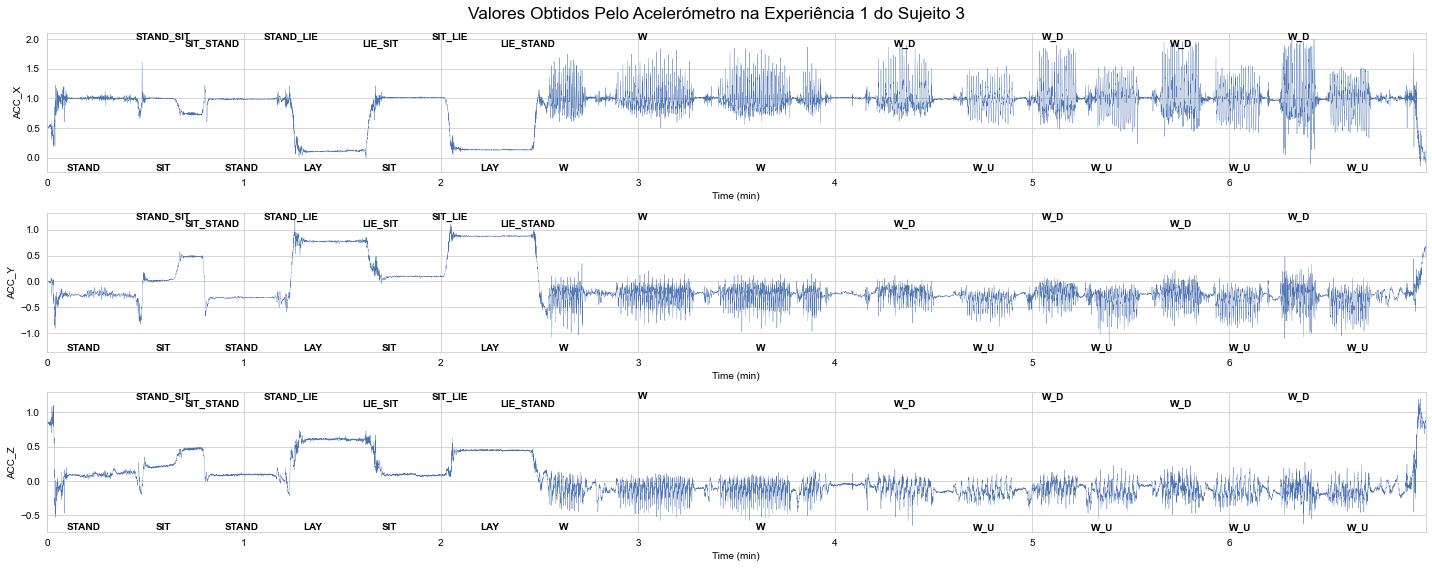

In [13]:
downintervals = [ 0.1, 0.55, 0.9, 1.3, 1.7, 2.2, 2.6, 3.6, 4.7, 5.3, 6, 6.6]
upintervals = [ 0.45, 0.7, 1.1, 1.6, 1.95, 2.3, 3, 4.3, 5.05, 5.7, 6.3 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]
plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_1, 4)

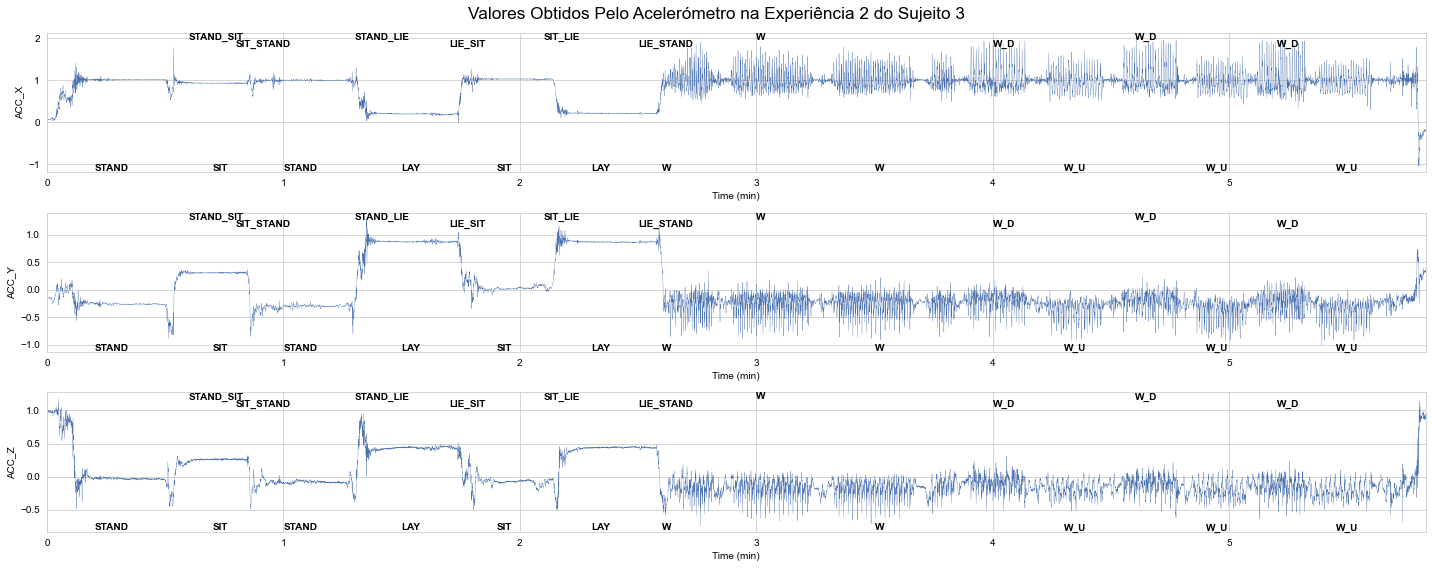

In [14]:
downintervals = [ 0.2, 0.7, 1, 1.5, 1.9, 2.3, 2.6, 3.5, 4.3, 4.9, 5.45 ]
upintervals = [ 0.6, 0.8, 1.3, 1.7, 2.1, 2.5, 3, 4, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "SIT", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_SIT", "SIT_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user3_2, 5)

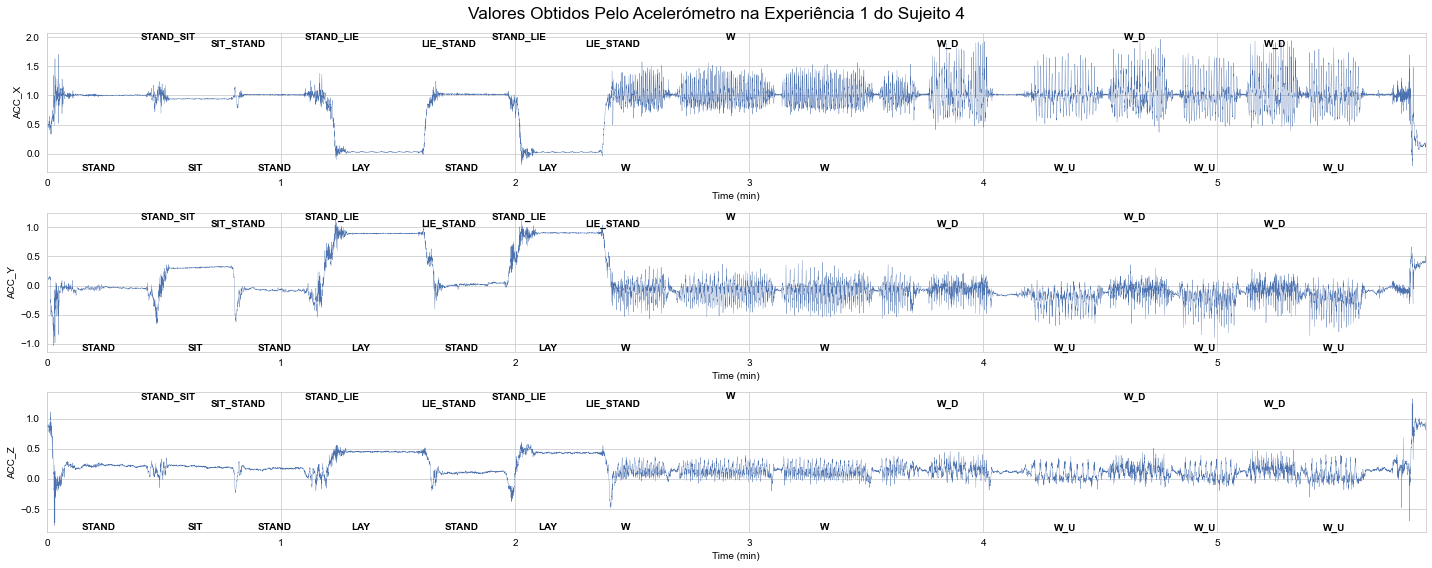

In [15]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.7, 2.1, 2.45, 3.3, 4.3, 4.9, 5.45 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.3, 2.9, 3.8, 4.6, 5.2 ]

downlabels = [ "STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [ "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D" ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_1, 6)

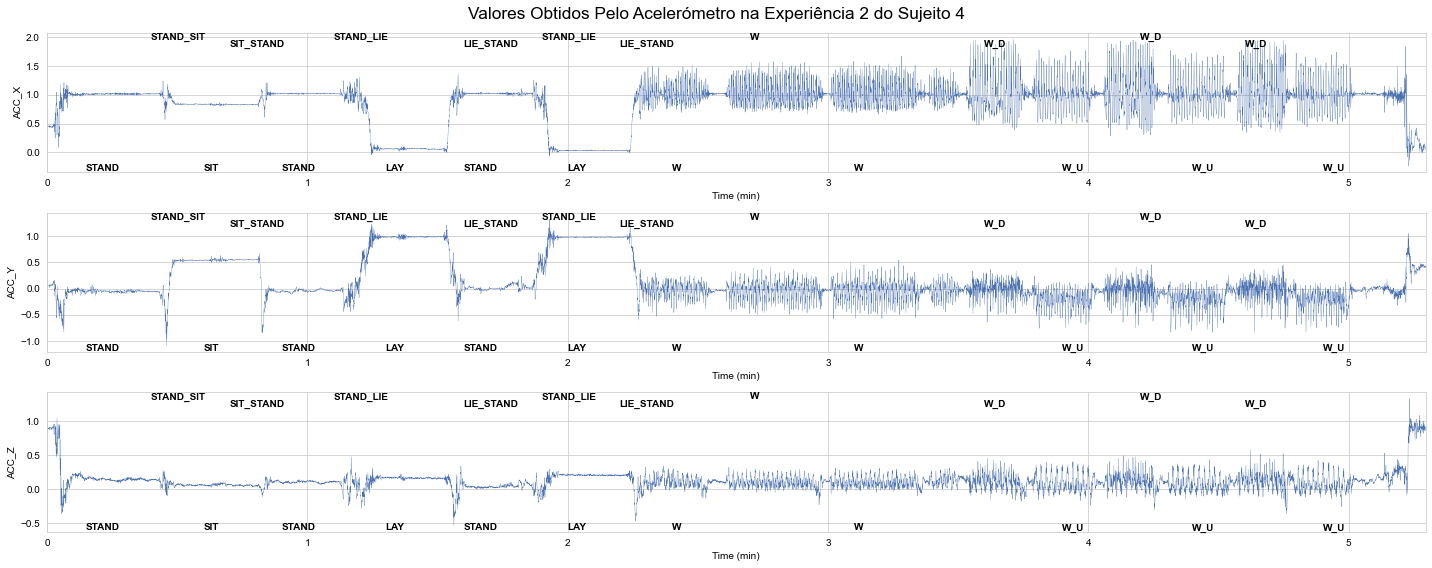

In [16]:
downintervals = [ 0.15, 0.6, 0.9, 1.3, 1.6, 2, 2.4, 3.1, 3.9, 4.4, 4.9 ]
upintervals = [ 0.4, 0.7, 1.1, 1.6, 1.9, 2.2, 2.7, 3.6, 4.2, 4.6 ]

downlabels = ["STAND", "SIT", "STAND", "LAY", "STAND", "LAY", "W", "W", "W_U", "W_U", "W_U", "W_U"]
uplabels = [  "STAND_SIT", "SIT_STAND", "STAND_LIE", "LIE_STAND", "STAND_LIE", "LIE_STAND", "W", "W_D", "W_D", "W_D", "W_D"  ]

plot_with_labels(upintervals, downintervals, uplabels, downlabels, user4_2, 7)

## cenas do 3

In [17]:
#uma segmentação das informações do user, num intervalo [*xi*, *xf*[
def ufrag(user, xi, xf):
    return user[ (xi<=user['Time (min)']) & (user['Time (min)'] < xf) ].reset_index().drop("index", axis = 1)

In [18]:
### Dá plot às informações dos 3 eixos de uma fragmentação do utilizador nos subplots *subplots*, com a cor *c*
## Para ajudar a análise também dá plot a uma linha com a média dos valores, bem como da média +/- 3* desvio padrão
def plot_walk(subplots, user, c):
    # subplots -- array com 3 subplots
    # c -- string com a cor
    # user -- DataFrame com o user
    xmean = user['X'].mean()
    xstd = user['X'].std()
    user.plot( x = 'Time (min)', y = 'X', ax = subplots[0], color = c )
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean ), 'k:')
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean + 3*xstd ), 'r--')
    subplots[0].plot( user['Time (min)'], np.full( (len(user['X']), ), xmean - 3*xstd ), 'r--')
    subplots[0].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[0].set_ylabel("ACC_X", c = 'white' if dark_background else 'black')
    subplots[0].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[0].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    ymean = user['Y'].mean()
    ystd = user['Y'].std()
    user.plot( x = 'Time (min)', y = 'Y', ax = subplots[1], color = c )
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean ), 'k:')
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean + 3*ystd ), 'r--')
    subplots[1].plot( user['Time (min)'], np.full( (len(user['Y']), ), ymean - 3*ystd ), 'r--')
    subplots[1].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[1].set_ylabel("ACC_Y", c = 'white' if dark_background else 'black')
    subplots[1].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[1].tick_params(axis='y', colors='white' if dark_background else 'black')
    
    zmean = user['Z'].mean()
    zstd = user['Z'].std()
    user.plot( x = 'Time (min)', y = 'Z', ax = subplots[2], color = c )
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean ), 'k:')
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean + 3*zstd ), 'r--')
    subplots[2].plot( user['Time (min)'], np.full( (len(user['Z']), ), zmean - 3*zstd ), 'r--')
    subplots[2].set_xlabel("Time (min)", c = 'white' if dark_background else 'black')
    subplots[2].set_ylabel("ACC_Z", c = 'white' if dark_background else 'black')
    subplots[2].tick_params(axis='x', colors='white' if dark_background else 'black')
    subplots[2].tick_params(axis='y', colors='white' if dark_background else 'black')

In [19]:
### Dá plot às informações nos eixos das fragmentações do utilizador
def plot_user_activity(user_walks, title):
    # user_walks -- array com as fragmentações dos dados do utilizador // não deve exceder 4 fragmentações.
    figure, subplots = plt.subplots(nrows = 6 if len(user_walks) > 2 else 3, ncols= 2, figsize = (15,10), facecolor = 'black' if dark_background else 'white')
    colors = ['royalblue', 'maroon', 'darkorange', 'olive']
    
    if dark_background:
        for i in range(6 if len(user_walks) > 2 else 3):
            for j in range(2):
                subplots[i,j].set_facecolor('k')
    
    for i in range(len(user_walks)):
        if i < 2:
            plot_walk(subplots[:3,i], user_walks[i], colors[i] )
            subplots[0,i].set_title(f"{title} {i+1}")
        else:
            plot_walk(subplots[3:,i-2], user_walks[i], colors[i] )
            subplots[3,i-2].set_title(f"{title} {i+1}")
    figure.tight_layout()

In [20]:
def set_between_std(user):
    xmean = user['X'].mean()
    xstd = user['X'].std()
    user['X'] = user['X'].map(lambda x: (xmean + 2.5*xstd) if (x > xmean + 3*xstd) 
                              else ( (xmean - 2.5*xstd) if (x < xmean - 3*xstd) 
                                    else x ) )
    
    ymean = user['Y'].mean()
    ystd = user['Y'].std()
    user['Y'] = user['Y'].map(lambda x: (ymean + 2.5*ystd) if (x > ymean + 3*ystd) 
                              else ( (ymean - 2.5*ystd) if (x < ymean - 3*ystd) 
                                    else x ) )
    
    zmean = user['Z'].mean()
    zstd = user['Z'].std()
    user['Z'] = user['Z'].map(lambda x: (zmean + 2.5*zstd) if (x > zmean + 3*zstd) 
                              else ( (zmean - 2.5*zstd) if (x < zmean - 3*zstd) 
                                    else x ) )

In [21]:
def detrend_user_walk(user):
    new = user.copy()
    new['X'] = signal.detrend(user['X'])
    new['Y'] = signal.detrend(user['Y'])
    new['Z'] = signal.detrend(user['Z'])
    return new

## Fragmentação da atividade dinâmica WALKING
### Primeiro Seccionar os intervalos da realização da atividade, de modo a poder operar apenas sobre eles

### AVALIAR A PRIMEIRA EXPERIÊNCIA DO PRIMEIRO VOLUNTÁRIO

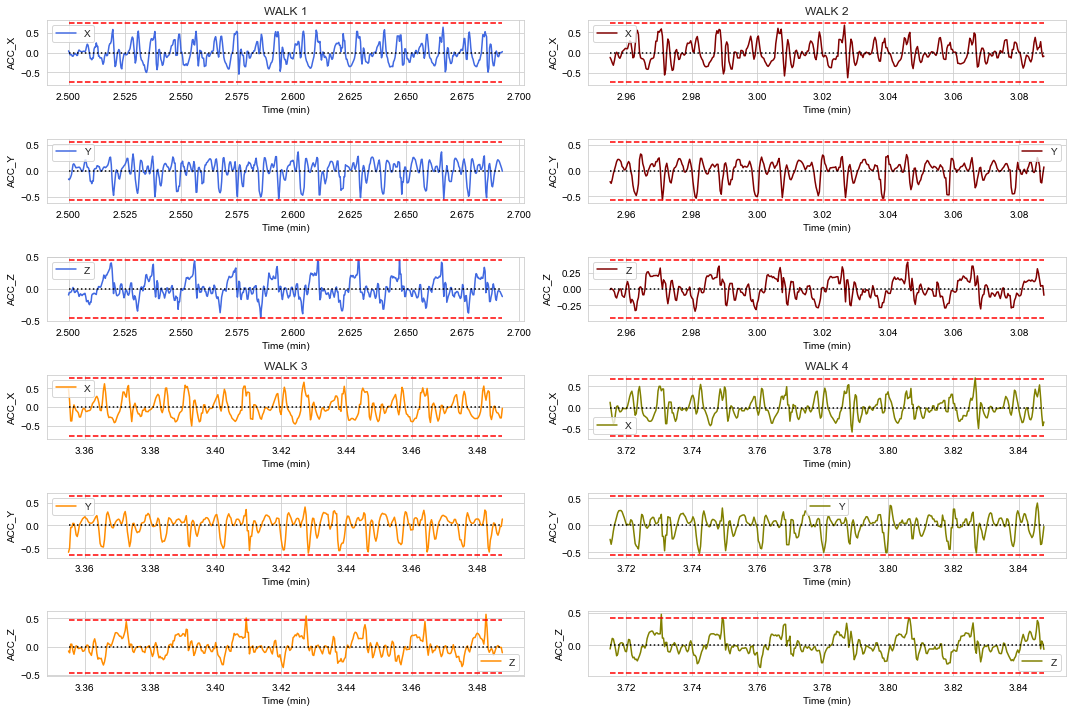

In [22]:
unow = user1_1
walks_user1_1 = [ ufrag(unow, 2.5, 2.693), ufrag(unow, 2.955, 3.088), ufrag(user1_1, 3.355, 3.488), ufrag(user1_1, 3.715, 3.848)]
walks_user1_1_detrended = []
for i in walks_user1_1:
    walks_user1_1_detrended.append( detrend_user_walk(i) )
plot_user_activity(walks_user1_1_detrended, 'WALK')

### Pela análise visual dos gráficos acima, a ação aparenta ter uma periodicidade próxima dos 0.019 s

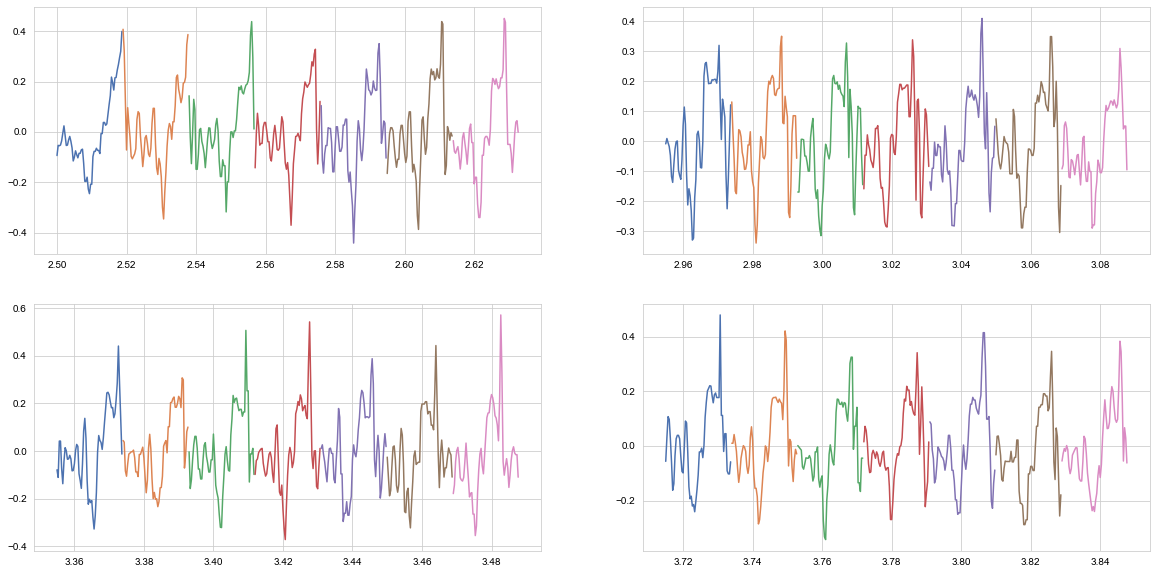

In [23]:
step = 57
fig = plt.figure(figsize = (20,10), facecolor='black'  if dark_background else 'white')

ax = plt.subplot(221)
for i in range(1,399//step + 1):
    plt.plot(walks_user1_1_detrended[0]['Time (min)'][(i-1)*step: i * step], walks_user1_1_detrended[0]['Z'][(i-1)*step: i * step])
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(222)
for i in range(1,399//step + 1):
    plt.plot(walks_user1_1_detrended[1]['Time (min)'][(i-1)*step: i * step], walks_user1_1_detrended[1]['Z'][(i-1)*step: i * step])
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')
ax = plt.subplot(223)
for i in range(1,399//step + 1):
    plt.plot(walks_user1_1_detrended[2]['Time (min)'][(i-1)*step: i * step], walks_user1_1_detrended[2]['Z'][(i-1)*step: i * step])
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')
ax = plt.subplot(224)
for i in range(1,399//step + 1):
    plt.plot(walks_user1_1_detrended[3]['Time (min)'][(i-1)*step: i * step], walks_user1_1_detrended[3]['Z'][(i-1)*step: i * step])
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')

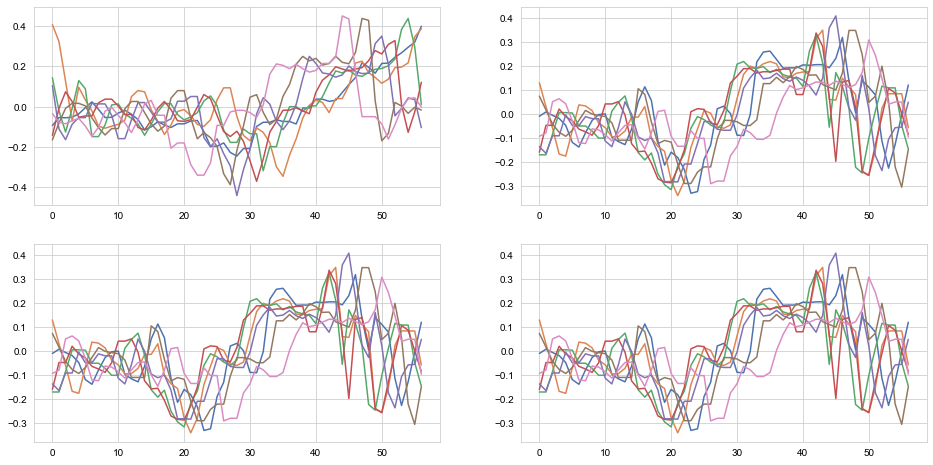

In [24]:
step = 57
plt.figure(figsize = (16,8), facecolor = 'black'  if dark_background else 'white')
    
ax = plt.subplot(221)
for i in range(399//step):
    values = np.array(walks_user1_1_detrended[0]['Z'])[i*step:(i+1)*step]
    plt.plot(range(len(values)), values )
    
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(222)
for i in range(399//step):
    values = np.array(walks_user1_1_detrended[1]['Z'])[i*step:(i+1)*step]
    plt.plot(range(len(values)), values )
    
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')
    
ax = plt.subplot(223)    
for i in range(399//step):
    values = np.array(walks_user1_1_detrended[1]['Z'])[i*step:(i+1)*step]
    plt.plot(range(len(values)), values )

    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')
ax = plt.subplot(224)
for i in range(399//step):
    values = np.array(walks_user1_1_detrended[1]['Z'])[i*step:(i+1)*step]
    plt.plot(range(len(values)), values )
    
    plt.tick_params(axis='x', colors='white' if dark_background else 'black')
    plt.tick_params(axis='y', colors='white' if dark_background else 'black')
    ax.set_facecolor("black" if dark_background else 'white')

### Como é visível pelos gráficos acima, parece legítimo considerar 57 como um valor aproximado de N para o intervalo criado, havendo uma sobreposição de todas as divisões e aproximando se bastante de um período no gráfico acima. Visualmente, no gráfico anterior, também se verifica que as diferentes cores se assemelham a um período

# Fragmentação de Atividades Dinâmicas

## Fragmentação em Intervalos: WALKING

In [25]:
unow = user1_1
walks_user1_1 = [ ufrag(unow, 2.5, 2.693), ufrag(unow, 2.8, 3.15), ufrag(unow, 3.3, 3.5), ufrag(unow, 3.6, 3.9)]

unow = user1_2
walks_user1_2 = [  ufrag(unow, 2.55, 2.7), ufrag(unow, 2.9, 3.2), ufrag(unow, 3.3, 3.6), ufrag(unow, 3.8, 4.1)]

unow = user2_1
walks_user2_1 = [ ufrag(unow, 2.5, 2.725), ufrag(unow, 2.9, 3.125), ufrag(unow, 3.3, 3.525) ]

unow = user2_2
walks_user2_2 = [ ufrag(unow, 2.2, 2.37), ufrag(unow, 2.5, 2.8), ufrag(unow, 2.9, 3.22) ]

unow = user3_1
walks_user3_1 = [ ufrag(unow, 2.55, 2.7), ufrag(unow, 2.9, 3.2), ufrag(unow, 3.5, 3.7) ]

unow = user3_2
walks_user3_2 = [ ufrag(unow, 2.65, 2.8), ufrag(unow, 2.9, 3.2), ufrag(unow, 3.4, 3.6) ]

unow = user4_1
walks_user4_1 = [ ufrag(unow, 2.5, 2.6), ufrag(unow, 2.7, 3.05), ufrag(unow, 3.2, 3.5) ]

unow = user4_2
walks_user4_2 = [ ufrag(unow, 2.3, 2.5), ufrag(unow, 2.6, 2.9), ufrag(unow, 3.05, 3.3) ]

walks_user1_1_detrended = []
for i in walks_user1_1:
    walks_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_user1_2_detrended = []
for i in walks_user1_2:
    walks_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_user2_1_detrended = []
for i in walks_user2_1:
    walks_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_user2_2_detrended = []
for i in walks_user2_2:
    walks_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_user3_1_detrended = []
for i in walks_user3_1:
    walks_user3_1_detrended.append( detrend_user_walk(i) )

walks_user3_2_detrended = []
for i in walks_user3_2:
    walks_user3_2_detrended.append( detrend_user_walk(i) )

walks_user4_1_detrended = []
for i in walks_user4_1:
    walks_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_user4_2_detrended = []
for i in walks_user4_2:
    walks_user4_2_detrended.append( detrend_user_walk(i) )


## Fragmentação de Intervalos: WALKING UPSTAIRS

In [26]:
unow = user1_1
walks_up_user1_1 = [ ufrag(unow, 4.7, 4.9), ufrag(unow, 5.25, 5.456), ufrag(unow, 5.75, 6) ]

unow = user1_2
walks_up_user1_2 = [  ufrag(unow, 4.71, 4.95), ufrag(unow, 5.3, 5.54), ufrag(unow, 5.9, 6.13)]

unow = user2_1
walks_up_user2_1 = [ ufrag(unow, 4.2, 4.435), ufrag(unow, 4.84, 5.01), ufrag(unow, 5.42, 5.63) ]

unow = user2_2
walks_up_user2_2 = [ ufrag(unow, 3.75, 3.99), ufrag(unow, 4.31, 4.5), ufrag(unow, 4.88, 5.1) ]

unow = user3_1
walks_up_user3_1 = [ ufrag(unow, 4.66, 4.92), ufrag(unow, 5.33, 5.54), ufrag(unow, 5.92, 6.15), ufrag(unow, 6.5, 6.72) ]

unow = user3_2
walks_up_user3_2 = [ ufrag(unow, 4.23, 4.47), ufrag(unow, 4.85, 5.05), ufrag(unow, 5.35, 5.6) ]

unow = user4_1
walks_up_user4_1 = [ ufrag(unow, 4.21, 4.49), ufrag(unow, 4.84, 5.1), ufrag(unow, 5.38, 5.6) ]

unow = user4_2
walks_up_user4_2 = [ ufrag(unow, 3.8, 4), ufrag(unow, 4.3, 4.54), ufrag(unow, 4.8, 5) ]

walks_up_user1_1_detrended = []
for i in walks_up_user1_1:
    walks_up_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user1_2_detrended = []
for i in walks_up_user1_2:
    walks_up_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_up_user2_1_detrended = []
for i in walks_up_user2_1:
    walks_up_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user2_2_detrended = []
for i in walks_up_user2_2:
    walks_up_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_up_user3_1_detrended = []
for i in walks_up_user3_1:
    walks_up_user3_1_detrended.append( detrend_user_walk(i) )

walks_up_user3_2_detrended = []
for i in walks_up_user3_2:
    walks_up_user3_2_detrended.append( detrend_user_walk(i) )

walks_up_user4_1_detrended = []
for i in walks_up_user4_1:
    walks_up_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_up_user4_2_detrended = []
for i in walks_up_user4_2:
    walks_up_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: WALKING DOWNSTAIRS

In [27]:
unow = user1_1
walks_down_user1_1 = [ ufrag(unow, 4.4, 4.65), ufrag(unow, 4.95, 5.15), ufrag(unow, 5.5, 5.74) ]

unow = user1_2
walks_down_user1_2 = [  ufrag(unow, 4.5, 4.65), ufrag(unow, 5, 5.23), ufrag(unow, 5.6, 5.83)]

unow = user2_1
walks_down_user2_1 = [ ufrag(unow, 3.89, 4.14), ufrag(unow, 4.54, 4.75), ufrag(unow, 5.15, 5.34) ]

unow = user2_2
walks_down_user2_2 = [ ufrag(unow, 3.47, 3.68), ufrag(unow, 4.05, 4.24), ufrag(unow, 4.62, 4.82) ]

unow = user3_1
walks_down_user3_1 = [ ufrag(unow, 4.22, 4.51), ufrag(unow, 5.03, 5.22), ufrag(unow, 5.64, 5.85), ufrag(unow, 6.26, 6.43) ]

unow = user3_2
walks_down_user3_2 = [ ufrag(unow, 3.89, 4.15), ufrag(unow, 4.54, 4.78), ufrag(unow, 5.1, 5.32) ]

unow = user4_1
walks_down_user4_1 = [ ufrag(unow, 3.77, 4), ufrag(unow, 4.53, 4.79), ufrag(unow, 5.12, 5.36) ]

unow = user4_2
walks_down_user4_2 = [ ufrag(unow, 3.53, 3.76), ufrag(unow, 4.05, 4.27), ufrag(unow, 4.575, 4.76) ]

walks_down_user1_1_detrended = []
for i in walks_down_user1_1:
    walks_down_user1_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user1_2_detrended = []
for i in walks_down_user1_2:
    walks_down_user1_2_detrended.append( detrend_user_walk(i) )
    
walks_down_user2_1_detrended = []
for i in walks_down_user2_1:
    walks_down_user2_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user2_2_detrended = []
for i in walks_down_user2_2:
    walks_down_user2_2_detrended.append( detrend_user_walk(i) )
    
walks_down_user3_1_detrended = []
for i in walks_down_user3_1:
    walks_down_user3_1_detrended.append( detrend_user_walk(i) )

walks_down_user3_2_detrended = []
for i in walks_down_user3_2:
    walks_down_user3_2_detrended.append( detrend_user_walk(i) )

walks_down_user4_1_detrended = []
for i in walks_down_user4_1:
    walks_down_user4_1_detrended.append( detrend_user_walk(i) )
    
walks_down_user4_2_detrended = []
for i in walks_down_user4_2:
    walks_down_user4_2_detrended.append( detrend_user_walk(i) )

# Fragmentação de Atividades Estacionárias

## Fragmentação em Intervalos: STAND

In [28]:
unow = user1_1
stand_user1_1 = [ ufrag(unow, 0.09, 0.4), ufrag(unow, 0.79, 1.09) ]

unow = user1_2
stand_user1_2 = [ ufrag(unow, 0.09, 0.4), ufrag(unow, 0.8, 1.08) ]

unow = user2_1
stand_user2_1 = [ ufrag(unow, 0.13, 0.45), ufrag(unow, 0.93, 1.26) ]

unow = user2_2
stand_user2_2 = [ ufrag(unow, 0.19, 0.44), ufrag(unow, 0.82, 1)]

unow = user3_1
stand_user3_1 = [ ufrag(unow, 0.12, 0.43), ufrag(unow, 0.83, 1.15)]

unow = user3_2
stand_user3_2 = [ ufrag(unow, 0.19, 0.49), ufrag(unow, 1, 1.26)]

unow = user4_1
stand_user4_1 = [ ufrag(unow, 0.145, 0.42), ufrag(unow, 0.85, 1.09) ]

unow = user4_2
stand_user4_2 = [ ufrag(unow, 0.11, 0.43), ufrag(unow, 0.87, 1.12) ]

stand_user1_1_detrended = []
for i in stand_user1_1:
    stand_user1_1_detrended.append( detrend_user_walk(i) )
    
stand_user1_2_detrended = []
for i in stand_user1_2:
    stand_user1_2_detrended.append( detrend_user_walk(i) )
    
stand_user2_1_detrended = []
for i in stand_user2_1:
    stand_user2_1_detrended.append( detrend_user_walk(i) )
    
stand_user2_2_detrended = []
for i in stand_user2_2:
    stand_user2_2_detrended.append( detrend_user_walk(i) )
    
stand_user3_1_detrended = []
for i in stand_user3_1:
    stand_user3_1_detrended.append( detrend_user_walk(i) )

stand_user3_2_detrended = []
for i in stand_user3_2:
    stand_user3_2_detrended.append( detrend_user_walk(i) )

stand_user4_1_detrended = []
for i in stand_user4_1:
    stand_user4_1_detrended.append( detrend_user_walk(i) )
    
stand_user4_2_detrended = []
for i in stand_user4_2:
    stand_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: SIT

In [29]:
unow = user1_1
sit_user1_1 = [ ufrag(unow, 0.47, 0.73), ufrag(unow, 1.59, 1.88) ]

unow = user1_2
sit_user1_2 = [ ufrag(unow, 0.47, 0.74), ufrag(unow, 1.54, 1.81) ]

unow = user2_1
sit_user2_1 = [ ufrag(unow, 0.58, 0.87), ufrag(unow, 1.82, 2.05) ]

unow = user2_2
sit_user2_2 = [ ufrag(unow, 0.52, 0.76), ufrag(unow, 1.50, 1.76)]

unow = user3_1
sit_user3_1 = [ ufrag(unow, 0.51, 0.78), ufrag(unow, 1.71, 2)]

unow = user3_2
sit_user3_2 = [ ufrag(unow, 0.56, 0.85), ufrag(unow, 1.85, 2.13)]

unow = user4_1
sit_user4_1 = [ ufrag(unow, 0.53, 0.79), ufrag(unow, 1.68, 1.96) ]

unow = user4_2
sit_user4_2 = [ ufrag(unow, 0.50, 0.80), ufrag(unow, 1.62, 1.85) ]

sit_user1_1_detrended = []
for i in sit_user1_1:
    sit_user1_1_detrended.append( detrend_user_walk(i) )
    
sit_user1_2_detrended = []
for i in sit_user1_2:
    sit_user1_2_detrended.append( detrend_user_walk(i) )
    
sit_user2_1_detrended = []
for i in sit_user2_1:
    sit_user2_1_detrended.append( detrend_user_walk(i) )
    
sit_user2_2_detrended = []
for i in sit_user2_2:
    sit_user2_2_detrended.append( detrend_user_walk(i) )
    
sit_user3_1_detrended = []
for i in sit_user3_1:
    sit_user3_1_detrended.append( detrend_user_walk(i) )

sit_user3_2_detrended = []
for i in sit_user3_2:
    sit_user3_2_detrended.append( detrend_user_walk(i) )

sit_user4_1_detrended = []
for i in sit_user4_1:
    sit_user4_1_detrended.append( detrend_user_walk(i) )
    
sit_user4_2_detrended = []
for i in sit_user4_2:
    sit_user4_2_detrended.append( detrend_user_walk(i) )

## Fragmentação em Intervalos: LAY

In [30]:
unow = user1_1
lay_user1_1 = [ ufrag(unow, 1.22, 1.51), ufrag(unow, 2.05, 2.26) ]

unow = user1_2
lay_user1_2 = [ ufrag(unow, 1.20, 1.47), ufrag(unow, 1.94, 2.14) ]

unow = user2_1
lay_user2_1 = [ ufrag(unow, 1.42, 1.70), ufrag(unow, 2.13, 2.45) ]

unow = user2_2
lay_user2_2 = [ ufrag(unow, 1.18, 1.44), ufrag(unow, 1.85, 2.12)]

unow = user3_1
lay_user3_1 = [ ufrag(unow, 1.30, 1.61), ufrag(unow, 2.08, 2.45)]

unow = user3_2
lay_user3_2 = [ ufrag(unow, 1.38, 1.72), ufrag(unow, 2.20, 2.57)]

unow = user4_1
lay_user4_1 = [ ufrag(unow, 1.28, 1.58), ufrag(unow, 2.10, 2.36) ]

unow = user4_2
lay_user4_2 = [ ufrag(unow, 1.26, 1.52), ufrag(unow, 1.95, 2.23) ]

lay_user1_1_detrended = []
for i in lay_user1_1:
    lay_user1_1_detrended.append( detrend_user_walk(i) )
    
lay_user1_2_detrended = []
for i in lay_user1_2:
    lay_user1_2_detrended.append( detrend_user_walk(i) )
    
lay_user2_1_detrended = []
for i in lay_user2_1:
    lay_user2_1_detrended.append( detrend_user_walk(i) )
    
lay_user2_2_detrended = []
for i in lay_user2_2:
    lay_user2_2_detrended.append( detrend_user_walk(i) )
    
lay_user3_1_detrended = []
for i in lay_user3_1:
    lay_user3_1_detrended.append( detrend_user_walk(i) )

lay_user3_2_detrended = []
for i in lay_user3_2:
    lay_user3_2_detrended.append( detrend_user_walk(i) )

lay_user4_1_detrended = []
for i in lay_user4_1:
    lay_user4_1_detrended.append( detrend_user_walk(i) )
    
lay_user4_2_detrended = []
for i in lay_user4_2:
    lay_user4_2_detrended.append( detrend_user_walk(i) )

# Fragmentação de Atividades de Transição

## Fragmentação em Intervalos: STAND_SIT

In [31]:
unow = user1_1
stand_sit_user1_1 = ufrag(unow, 0.42, 0.46)
stand_sit_user1_1_detrended = detrend_user_walk(stand_sit_user1_1)

unow = user1_2
stand_sit_user1_2 = ufrag(unow, 0.41, 0.45)
stand_sit_user1_2_detrended = detrend_user_walk(stand_sit_user1_2)

unow = user2_1
stand_sit_user2_1 = ufrag(unow, 0.455, 0.56)
stand_sit_user2_1_detrended = detrend_user_walk(stand_sit_user2_1)

unow = user2_2
stand_sit_user2_2 = ufrag(unow, 0.45, 0.51)
stand_sit_user2_2_detrended = detrend_user_walk(stand_sit_user2_2)

unow = user3_1
stand_sit_user3_1 = ufrag(unow, 0.44, 0.52)
stand_sit_user3_1_detrended = detrend_user_walk(stand_sit_user3_1)

unow = user3_2
stand_sit_user3_2 = ufrag(unow, 0.50, 0.55)
stand_sit_user3_2_detrended = detrend_user_walk(stand_sit_user3_2)

unow = user4_1
stand_sit_user4_1 = ufrag(unow, 0.42, 0.52)
stand_sit_user4_1_detrended = detrend_user_walk(stand_sit_user4_1)

unow = user4_2
stand_sit_user4_2 = ufrag(unow, 0.43, 0.49)
stand_sit_user4_2_detrended = detrend_user_walk(stand_sit_user4_2)

## Fragmentação em Intervalos: SIT_STAND

In [32]:
unow = user1_1
sit_stand_user1_1 = ufrag(unow, 0.73, 0.78)
sit_stand_user1_1_detrended = detrend_user_walk(sit_stand_user1_1)

unow = user1_2
sit_stand_user1_2 = ufrag(unow, 0.74, 0.79)
sit_stand_user1_2_detrended = detrend_user_walk(sit_stand_user1_2)

unow = user2_1
sit_stand_user2_1 = ufrag(unow, 0.88, 0.91)
sit_stand_user2_1_detrended = detrend_user_walk(sit_stand_user2_1)

unow = user2_2
sit_stand_user2_2 = ufrag(unow, 0.76, 0.82)
sit_stand_user2_2_detrended = detrend_user_walk(sit_stand_user2_2)

unow = user3_1
sit_stand_user3_1 = ufrag(unow, 0.78, 0.83)
sit_stand_user3_1_detrended = detrend_user_walk(sit_stand_user3_1)

unow = user3_2
sit_stand_user3_2 = ufrag(unow, 0.84, 1)
sit_stand_user3_2_detrended = detrend_user_walk(sit_stand_user3_2)

unow = user4_1
sit_stand_user4_1 = ufrag(unow, 0.79, 0.84)
sit_stand_user4_1_detrended = detrend_user_walk(sit_stand_user4_1)

unow = user4_2
sit_stand_user4_2 = ufrag(unow, 0.80, 0.87)
sit_stand_user4_2_detrended = detrend_user_walk(sit_stand_user4_2)

## Fragmentação em Intervalos: STAND_LIE

In [33]:
unow = user1_1
stand_lie_user1_1 = ufrag(unow, 1.1, 1.21)
stand_lie_user1_1_detrended = detrend_user_walk(stand_lie_user1_1)

unow = user1_2
stand_lie_user1_2 = ufrag(unow, 1.08, 1.19)
stand_lie_user1_2_detrended = detrend_user_walk(stand_lie_user1_2)

unow = user2_1
stand_lie_user2_1 = ufrag(unow, 1.33, 1.45)
stand_lie_user2_1_detrended = detrend_user_walk(stand_lie_user2_1)

unow = user2_2
stand_lie_user2_2 = ufrag(unow, 1.10, 1.19)
stand_lie_user2_2_detrended = detrend_user_walk(stand_lie_user2_2)

unow = user3_1
stand_lie_user3_1 = ufrag(unow, 1.19, 1.31)
stand_lie_user3_1_detrended = detrend_user_walk(stand_lie_user3_1)

unow = user3_2
stand_lie_user3_2 = ufrag(unow, 1.29, 1.39)
stand_lie_user3_2_detrended = detrend_user_walk(stand_lie_user3_2)

unow = user4_1
stand_lie_user4_1 = ufrag(unow, 1.11, 1.28)
stand_lie_user4_1_detrended = detrend_user_walk(stand_lie_user4_1)

unow = user4_2
stand_lie_user4_2 = ufrag(unow, 1.13, 1.28)
stand_lie_user4_2_detrended = detrend_user_walk(stand_lie_user4_2)

## Fragmentação em Intervalos: LIE_SIT

In [34]:
unow = user1_1
lie_sit_user1_1 = ufrag(unow, 1.5, 1.57)
lie_sit_user1_1_detrended = detrend_user_walk(lie_sit_user1_1)

unow = user1_2
lie_sit_user1_2 = ufrag(unow, 1.48, 1.54)
lie_sit_user1_2_detrended = detrend_user_walk(lie_sit_user1_2)

unow = user2_1
lie_sit_user2_1 = ufrag(unow, 1.71, 1.81)
lie_sit_user2_1_detrended = detrend_user_walk(lie_sit_user2_1)

unow = user2_2
lie_sit_user2_2 = ufrag(unow, 1.44, 1.50)
lie_sit_user2_2_detrended = detrend_user_walk(lie_sit_user2_2)

unow = user3_1
lie_sit_user3_1 = ufrag(unow, 1.61, 1.70)
lie_sit_user3_1_detrended = detrend_user_walk(lie_sit_user3_1)

unow = user3_2
lie_sit_user3_2 = ufrag(unow, 1.73, 1.83)
lie_sit_user3_2_detrended = detrend_user_walk(lie_sit_user3_2)

unow = user4_1
lie_sit_user4_1 = ufrag(unow, 1.60, 1.68)
lie_sit_user4_1_detrended = detrend_user_walk(lie_sit_user4_1)

unow = user4_2
lie_sit_user4_2 = ufrag(unow, 1.52, 1.60)
lie_sit_user4_2_detrended = detrend_user_walk(lie_sit_user4_2)

## Fragmentação em Intervalos: SIT_LIE

In [35]:
unow = user1_1
sit_lie_user1_1 = ufrag(unow, 1.88, 1.96)
sit_lie_user1_1_detrended = detrend_user_walk(sit_lie_user1_1)

unow = user1_2
sit_lie_user1_2 = ufrag(unow, 1.82, 1.92)
sit_lie_user1_2_detrended = detrend_user_walk(sit_lie_user1_2)

unow = user2_1
sit_lie_user2_1 = ufrag(unow, 2.05, 2.14)
sit_lie_user2_1_detrended = detrend_user_walk(sit_lie_user2_1)

unow = user2_2
sit_lie_user2_2 = ufrag(unow, 1.76, 1.85)
sit_lie_user2_2_detrended = detrend_user_walk(sit_lie_user2_2)

unow = user3_1
sit_lie_user3_1 = ufrag(unow, 2, 2.1)
sit_lie_user3_1_detrended = detrend_user_walk(sit_lie_user3_1)

unow = user3_2
sit_lie_user3_2 = ufrag(unow, 2.13, 2.20)
sit_lie_user3_2_detrended = detrend_user_walk(sit_lie_user3_2)

unow = user4_1
sit_lie_user4_1 = ufrag(unow, 1.95, 2.08)
sit_lie_user4_1_detrended = detrend_user_walk(sit_lie_user4_1)

unow = user4_2
sit_lie_user4_2 = ufrag(unow, 1.86, 1.94)
sit_lie_user4_2_detrended = detrend_user_walk(sit_lie_user4_2)

## Fragmentação em Intervalos: LIE_STAND

In [36]:
unow = user1_1
lie_stand_user1_1 = ufrag(unow, 2.26, 2.35)
lie_stand_user1_1_detrended = detrend_user_walk(lie_stand_user1_1)

unow = user1_2
lie_stand_user1_2 = ufrag(unow, 2.15, 2.26)
lie_stand_user1_2_detrended = detrend_user_walk(lie_stand_user1_2)

unow = user2_1
lie_stand_user2_1 = ufrag(unow, 2.45, 2.54)
lie_stand_user2_1_detrended = detrend_user_walk(lie_stand_user2_1)

unow = user2_2
lie_stand_user2_2 = ufrag(unow, 2.14, 2.22)
lie_stand_user2_2_detrended = detrend_user_walk(lie_stand_user2_2)

unow = user3_1
lie_stand_user3_1 = ufrag(unow, 2.46, 2.54)
lie_stand_user3_1_detrended = detrend_user_walk(lie_stand_user3_1)

unow = user3_2
lie_stand_user3_2 = ufrag(unow, 2.57, 2.6)
lie_stand_user3_2_detrended = detrend_user_walk(lie_stand_user3_2)

unow = user4_1
lie_stand_user4_1 = ufrag(unow, 2.36, 2.4)
lie_stand_user4_1_detrended = detrend_user_walk(lie_stand_user4_1)

unow = user4_2
lie_stand_user4_2 = ufrag(unow, 2.23, 2.27)
lie_stand_user4_2_detrended = detrend_user_walk(lie_stand_user4_2)

### Seleção da Janela para Segmentar as atividades

##### Nos Slides das Tps há 3 exemplos de janelas usadas para estudos de frequências associadas a sinais. Estas são a janela de Blackman, de Hamming e de Hanning. Na documentação da livraria numpy, é possível encontrar mais algumas com história. A janela de Bartlett, que tem a forma de um triângulo, e a janela de Kaiser, que tem como parâmetro um beta que na prática serve como fator de equilibrio tempo-frequência na análise do sinal.

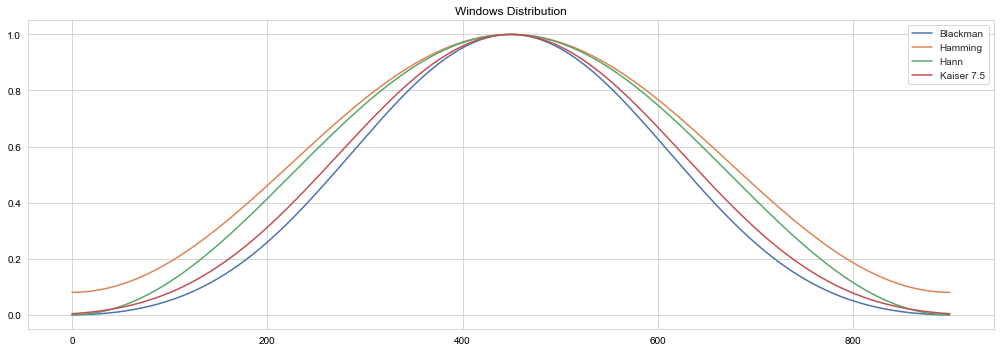

In [98]:
uteste = walks_user3_2[1]
size = len(uteste)
bwindow = signal.windows.blackman(size)
hmwindow = np.hamming(size)
hnwindow = signal.windows.hann(size)
beta = 7.5
kwindow = signal.windows.kaiser(size, beta)
## PLOTTING 
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)

plt.plot(bwindow, label = 'Blackman')
plt.plot(hmwindow, label = 'Hamming')
plt.plot(hnwindow, label = 'Hann')
plt.plot(kwindow, label = f'Kaiser {beta}')

plt.title("Windows Distribution", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.legend()
plt.tight_layout()

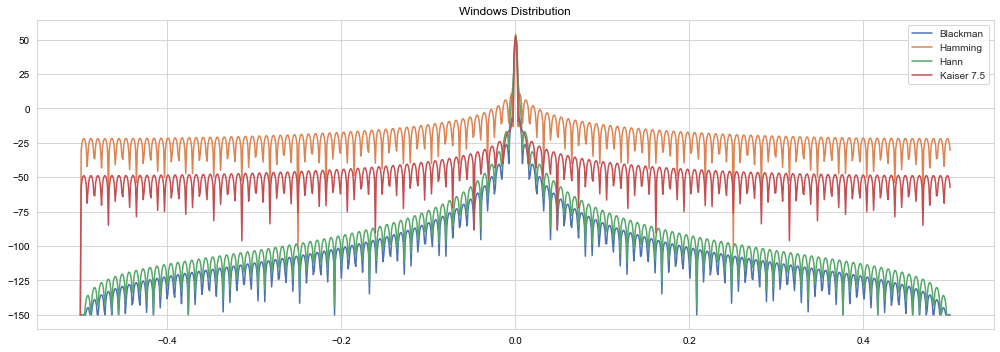

In [102]:
fbwindow = np.abs(fftshift(fft(bwindow,1024)))
fhmwindow = np.abs(fftshift(fft(hmwindow,1024)))
fhnwindow = np.abs(fftshift(fft(hnwindow,1024)))
fkwindow = np.abs(fftshift(fft(kwindow,1024)))

freq = np.linspace(-0.5, 0.5, 1024)

with np.errstate(divide='ignore', invalid='ignore'):
    nfbwindow = 20*np.log10(fbwindow)
    nfhmwindow = 20* np.log10(fhmwindow)
    nfhnwindow = 20 * np.log10(fhnwindow)
    nfkwindow = 20*np.log10(fkwindow)

nfbwindow = np.clip(nfbwindow, -150, 100)
nfhmwindow = np.clip(nfhmwindow, -150, 100)
nfhnwindow = np.clip(nfhnwindow, -150, 100)
nfkwindow = np.clip(nfkwindow, -150, 100)
    
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)

plt.plot(freq, nfbwindow, label = 'Blackman')
plt.plot(freq, nfhmwindow, label = 'Hamming')
plt.plot(freq, nfhnwindow, label = 'Hann')
plt.plot(freq, nfkwindow, label = f'Kaiser {beta}')

plt.title("Windows Distribution", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.legend()
plt.tight_layout()

##### Pelos gráficos das janelas no tempo e da resposta a frequência das janelas a pensamos que a mais apropriada para o este projeto será a Hann, apesar de na prática, com testes feitos anteriormente a este estudo, os resultados serem basicamente os mesmos. A janela de Hann, pelo que foi lido, tem uma eficiência na computação semelhante à da janela de hamming. Obtém resultados no tempo pioresno domínio do tempo, pois a sua janela atinge 0 nas pontas, o que pode alterar bastante o sinal original. No entanto, para a análise das frequências, isto não é algo negativo. Isto faz com que tenhamos a certeza de que não é adicionada nenhuma frequência indesejada na transformada. Pelos fragmentos feitos das atividades, também nos parece que com a quantidade de dados em cada fragmento, o abate das pontas não seja significativo para a perda total das frequências fundamentais à análise.

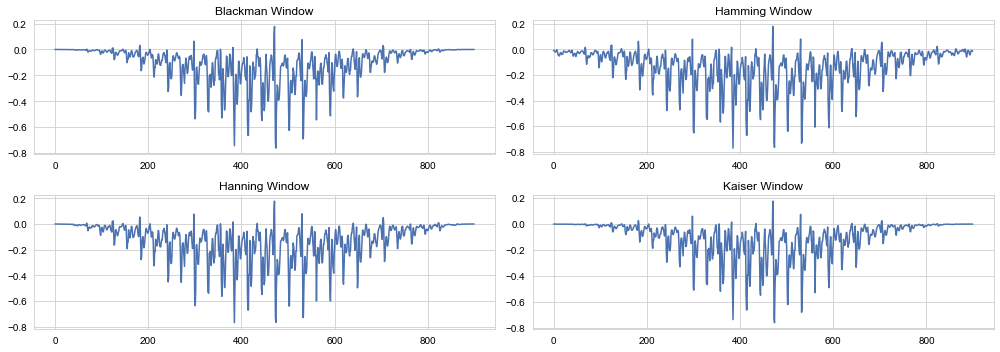

In [86]:
fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')
accax = 'Y'
ax = plt.subplot(221)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')


ax = plt.subplot(222)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(223)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(224)
plt.plot(kwindow*uteste[accax])
plt.title("Kaiser Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

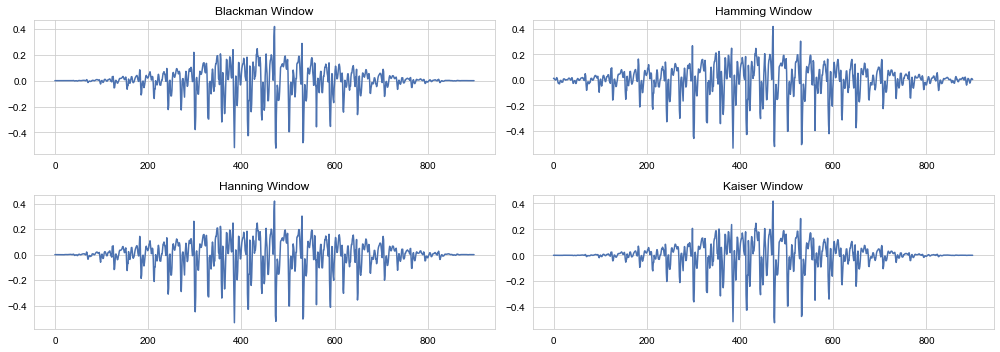

In [87]:
uteste = walks_user3_2_detrended[1]

fig = plt.figure(figsize=(14,5), facecolor = 'black' if dark_background else 'white')
accax = 'Y'
ax = plt.subplot(221)
plt.plot(bwindow*uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')


ax = plt.subplot(222)
plt.plot(hmwindow*uteste[accax])
plt.title("Hamming Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(223)
plt.plot(hnwindow*uteste[accax])
plt.title("Hanning Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

ax = plt.subplot(224)
plt.plot(kwindow*uteste[accax])
plt.title("Kaiser Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

user0_0
X: [1.72222222] 
 Magnitude: [46.51956735]
Y: [1.72222222] 
 Magnitude: [28.26726394]
Z: [0.83333333 0.88888889 1.72222222] 
 Magnitude: [13.12028662 13.76983327 16.15333502]
------------------
user0_0
X: [1.72222222] 
 Magnitude: [59.00249232]
Y: [1.72222222] 
 Magnitude: [35.99141463]
Z: [0.83333333 0.88888889 1.72222222] 
 Magnitude: [15.45378566 16.15416746 20.58918179]
------------------
user0_0
X: [1.72222222] 
 Magnitude: [55.09060314]
Y: [1.72222222] 
 Magnitude: [33.65271317]
Z: [0.83333333 0.88888889 1.72222222] 
 Magnitude: [14.88826468 15.63554835 19.25514949]
------------------
user0_0
X: [1.66666667 1.72222222 1.77777778] 
 Magnitude: [26.94101198 26.94643998 37.03549843]
Y: [1.66666667 1.72222222] 
 Magnitude: [16.50740994 22.30797496]
Z: [0.83333333 0.88888889 1.72222222 1.77777778] 
 Magnitude: [ 9.50315894 10.99983522 11.49424419 12.73255885]
------------------


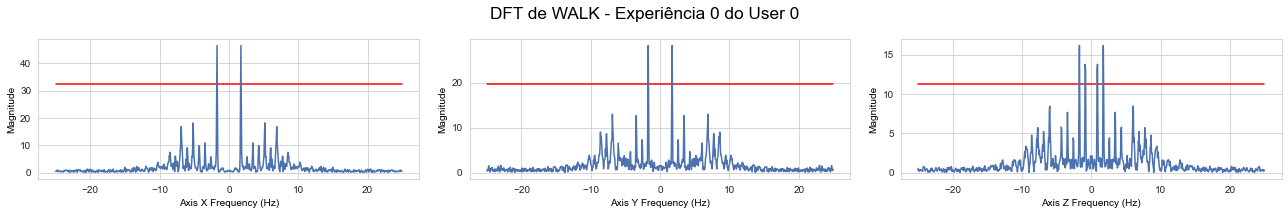

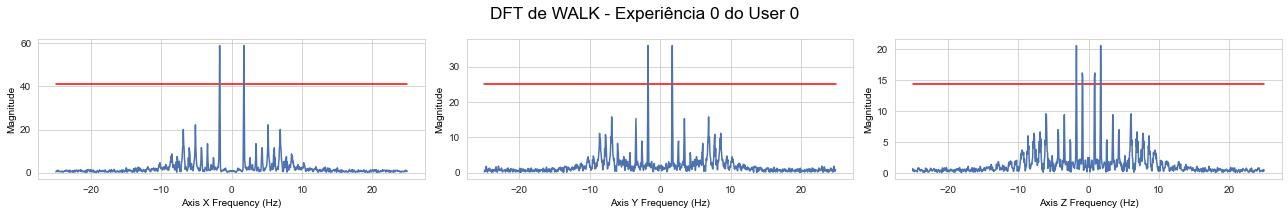

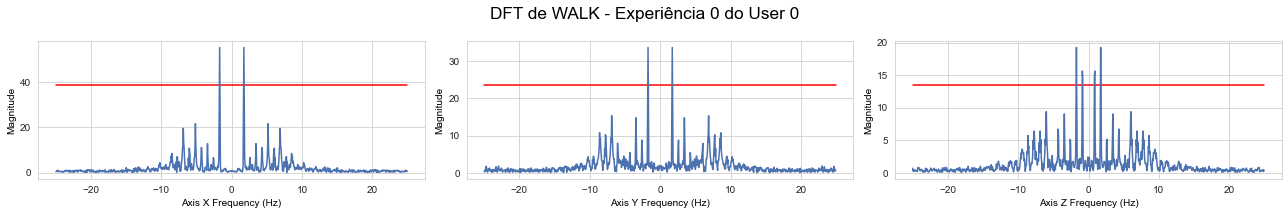

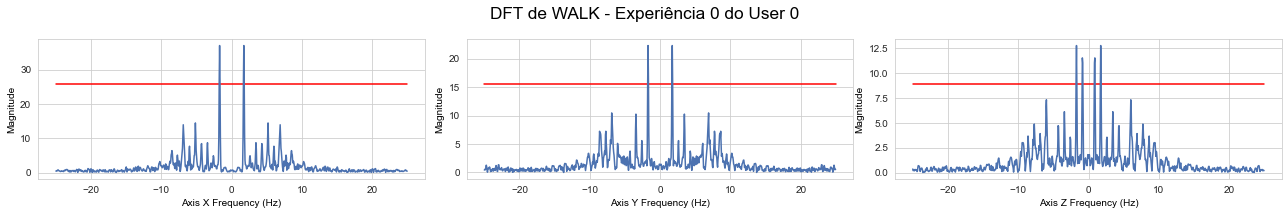

In [88]:
patamar = 0.7
plot_activity_dft(uteste, len(uteste), 0, 0, 'WALK', False, patamar,True,'b')
plot_activity_dft(uteste, len(uteste), 0, 0, 'WALK', False, patamar,True,'hm')
plot_activity_dft(uteste, len(uteste), 0, 0, 'WALK', False, patamar,True,'hn')
plot_activity_dft(uteste, len(uteste), 0, 0, 'WALK', False, patamar,True,'k')


#### Pela verificação do produto do das janelas, com o segmento do sinal associado a atividades dinâmicas e ao mesmo sinal após um 'detrend', verifica-se que o sinal detrended obtém melhores resultados para uma melhor análise, pois fica mais simétrico em relação ao eixo central.
#### A janela a ser usada ainda não está decidida

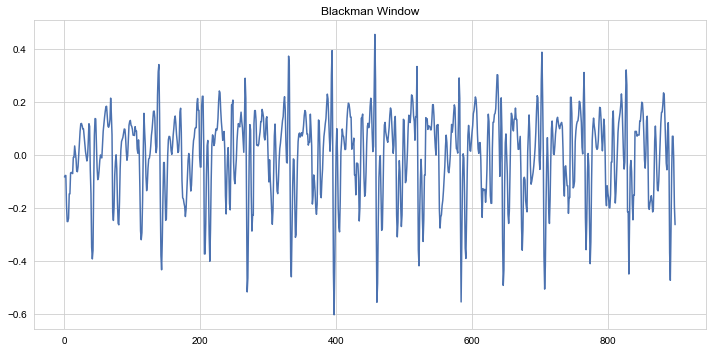

In [398]:
fig = plt.figure(figsize=(10,5), facecolor = 'black' if dark_background else 'white')

ax = plt.subplot(111)
plt.plot(uteste[accax])
plt.title("Blackman Window", color = 'white' if dark_background else 'black')
plt.tick_params(axis='x', colors='white' if dark_background else 'black')
plt.tick_params(axis='y', colors='white' if dark_background else 'black')
ax.set_facecolor("black" if dark_background else 'white')

plt.tight_layout()

In [77]:
def plot_activity_dft(user_frag_act, N, user, exp, title, zeros, percent, plotit, wind):
    fs = 50
    if N%2==0:
        f = np.linspace( -fs/2, fs/2 - fs/N, N) 
    else:
        f = np.linspace( -fs/2 + fs/2/N, fs/2 - fs/2/N, N)
    if wind=='b':
        window = signal.windows.blackman(N)
    elif wind=='hm':
        window = np.hamming(N)
    elif wind=='hn':
        window = signal.windows.hann(N)
    elif wind=='k':
        window = signal.windows.kaiser(N,14)
    else:
        return
    
    dfts = []
    dfts.append( np.abs( fftshift( fft( user_frag_act['X'] * window ) ) ) ) 
    dfts.append( np.abs( fftshift( fft( user_frag_act['Y'] * window ) ) ) )
    dfts.append( np.abs( fftshift( fft( user_frag_act['Z'] * window ) ) ) )
    
    if plotit:
    
        figure, subplots = plt.subplots(nrows = 1, ncols= 3, figsize = (18,3), facecolor = 'black'  if dark_background else 'white')
        figure.suptitle(f'DFT de {title} - Experiência {exp} do User {user}', fontsize = 'xx-large', c = 'white'  if dark_background else 'black')
        
        if dark_background:
            subplots[0].set_facecolor('k')
            subplots[1].set_facecolor('k')
            subplots[2].set_facecolor('k')
            
        if zeros:
            for i in range(3):
                dfts[i][ dfts[i]<np.max(dfts[i])*percent ] = 0
        else:
            for i in range(3):
                subplots[i].plot(f, np.full(f.shape,np.max(dfts[i])*percent), 'r')
        
        for i in range(3):
            #marker, stem, base = subplots[i].stem(f, dfts[i])
            #stem.set_linewidth(0.8)
            #plt.setp(marker, markersize = 3)
            subplots[i].plot(f, dfts[i])

        subplots[0].set_xlabel("Axis X Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[1].set_xlabel("Axis Y Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[2].set_xlabel("Axis Z Frequency (Hz)", c = 'white'  if dark_background else 'black')
        subplots[0].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
        subplots[1].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
        subplots[2].set_ylabel("Magnitude", c = 'white'  if dark_background else 'black')
    
        figure.tight_layout()
    if ~plotit:
        for i in range(3):
            dfts[i][ dfts[i]<np.max(dfts[i])*percent ] = 0
    
    print(f'user{user}_{exp}')
    print('X:', np.unique(np.round(np.abs(f[np.where(dfts[0])]), 8)), "\n", 'Magnitude:' , np.unique(np.round(dfts[0][dfts[0]>0], 8)))
    print('Y:', np.unique(np.round(np.abs(f[np.where(dfts[1])]), 8)),"\n", 'Magnitude:' , np.unique(np.round(dfts[1][dfts[1]>0], 8)))
    print('Z:', np.unique(np.round(np.abs(f[np.where(dfts[2])]), 8)),"\n", 'Magnitude:' , np.unique(np.round(dfts[2][dfts[2]>0], 8)))
    print('------------------')

## DFT's da atividades WALK de todos as experiências

In [ ]:
index = 0
patamar = 0.65
plot_activity_dft(walks_user3_1_detrended[index], len(walks_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,True)
plot_activity_dft(walks_user3_2_detrended[index], len(walks_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_1_detrended[index], len(walks_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_2_detrended[index], len(walks_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

In [ ]:
index = 1
patamar = 0.65
plot_activity_dft(walks_user3_1_detrended[index], len(walks_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user3_2_detrended[index], len(walks_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_1_detrended[index], len(walks_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_2_detrended[index], len(walks_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

In [ ]:
index = 2
patamar = 0.50
plot_activity_dft(walks_user3_1_detrended[index], len(walks_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user3_2_detrended[index], len(walks_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_1_detrended[index], len(walks_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_user4_2_detrended[index], len(walks_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

#### A atividade walk, pelos valores obtidos, com valores de magnitude acima dos 50% da magnitude máxima, aparenta apenas sofrer valores significativos nas acelerações dos eixos Z.
#### Visto que há valores que são exatamentes iguais em todos os eixos, pensamos possível assumir que seja alguma frequência não significativa para a atividade, mas ainda podemos assumir uma posição diferente relativa a isto.

## DFT's da atividades WALK_DOWN de todos as experiências

In [ ]:
index = 0
patamar = 0.65
plot_activity_dft(walks_down_user3_1_detrended[index], len(walks_down_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user3_2_detrended[index], len(walks_down_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_1_detrended[index], len(walks_down_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_2_detrended[index], len(walks_down_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

In [ ]:
index = 1
patamar = 0.7
plot_activity_dft(walks_down_user3_1_detrended[index], len(walks_down_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user3_2_detrended[index], len(walks_down_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_1_detrended[index], len(walks_down_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_2_detrended[index], len(walks_down_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

In [ ]:
index = 2
patamar = 0.7
plot_activity_dft(walks_down_user3_1_detrended[index], len(walks_down_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,True)
plot_activity_dft(walks_down_user3_2_detrended[index], len(walks_down_user3_2_detrended[index]), 3, 2, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_1_detrended[index], len(walks_down_user4_1_detrended[index]), 4, 1, 'WALK UP', True, patamar,False)
plot_activity_dft(walks_down_user4_2_detrended[index], len(walks_down_user4_2_detrended[index]), 4, 2, 'WALK UP', True, patamar,False)

In [ ]:
index = 3
patamar = 0.7
plot_activity_dft(walks_down_user3_1_detrended[index], len(walks_down_user3_1_detrended[index]), 3, 1, 'WALK UP', True, patamar,False)
